In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

11493376/11490434 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


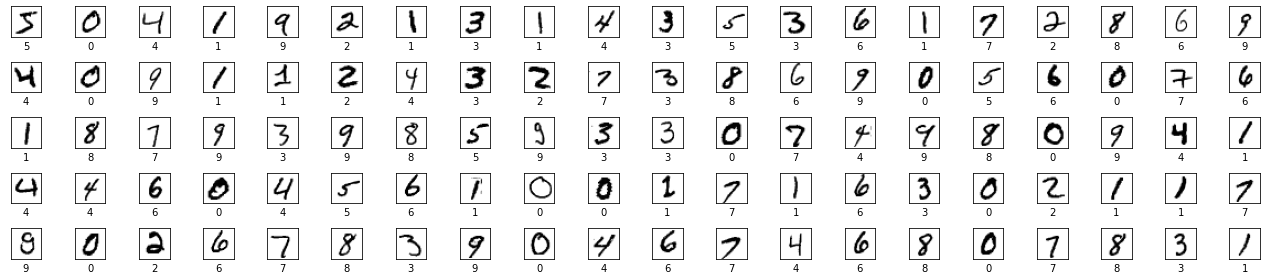

In [3]:
ROWS = 5
COLS = 20
i = 0

plt.figure(figsize=(18,4))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [4]:
x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28,28,1)
x_train_normalized = x_train.reshape(-1, 28,28,1)/255.0
x_test_normalized = x_test.reshape(-1, 28,28,1)/255.0

In [5]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [7]:

adam_model=model
sgd_model=model
rmsprop_model=model

In [8]:
adam_model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:
sgd_model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
rmsprop_model.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

**Without using normalized data**

In [11]:
h = adam_model.fit(x=x_train, y=y_train, epochs=5,validation_split=0.2,batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 51s 33ms/step - loss: 0.3365 - accuracy: 0.9204 - val_loss: 0.0875 - val_accuracy: 0.9769
Epoch 2/5
1500/1500 [==============================] - 50s 33ms/step - loss: 0.1040 - accuracy: 0.9725 - val_loss: 0.0816 - val_accuracy: 0.9780
Epoch 3/5
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0920 - accuracy: 0.9774 - val_loss: 0.0900 - val_accuracy: 0.9772
Epoch 4/5
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0872 - accuracy: 0.9804 - val_loss: 0.0866 - val_accuracy: 0.9794
Epoch 5/5
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0823 - accuracy: 0.9816 - val_loss: 0.1126 - val_accuracy: 0.9774


In [12]:
test_loss, test_acc = adam_model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.1144 - accuracy: 0.9777

Test accuracy: 0.9776999950408936


In [13]:

x = sgd_model.fit(x=x_train, y=y_train, epochs=5 ,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0845 - accuracy: 0.9832 - val_loss: 0.1185 - val_accuracy: 0.9822
Epoch 2/5
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0888 - accuracy: 0.9831 - val_loss: 0.1475 - val_accuracy: 0.9753
Epoch 3/5
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0905 - accuracy: 0.9829 - val_loss: 0.2039 - val_accuracy: 0.9778
Epoch 4/5
1500/1500 [==============================] - 50s 34ms/step - loss: 0.0897 - accuracy: 0.9834 - val_loss: 0.1296 - val_accuracy: 0.9743
Epoch 5/5
1500/1500 [==============================] - 50s 34ms/step - loss: 0.1017 - accuracy: 0.9823 - val_loss: 0.1099 - val_accuracy: 0.9825


In [14]:
test_loss, test_acc = sgd_model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.0955 - accuracy: 0.9822

Test accuracy: 0.982200026512146


In [15]:
y = rmsprop_model.fit(x=x_train, y=y_train, epochs=5 ,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0995 - accuracy: 0.9835 - val_loss: 0.1234 - val_accuracy: 0.9789
Epoch 2/5
1500/1500 [==============================] - 50s 34ms/step - loss: 0.1026 - accuracy: 0.9846 - val_loss: 0.1400 - val_accuracy: 0.9735
Epoch 3/5
1500/1500 [==============================] - 50s 34ms/step - loss: 0.1158 - accuracy: 0.9836 - val_loss: 0.1091 - val_accuracy: 0.9853
Epoch 4/5
1500/1500 [==============================] - 50s 33ms/step - loss: 0.1222 - accuracy: 0.9844 - val_loss: 0.2027 - val_accuracy: 0.9820
Epoch 5/5
1500/1500 [==============================] - 50s 33ms/step - loss: 0.1124 - accuracy: 0.9841 - val_loss: 0.3221 - val_accuracy: 0.9718


In [17]:
test_loss, test_acc = rmsprop_model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.2313 - accuracy: 0.9767

Test accuracy: 0.9767000079154968


** Comparison among ADAM,SGD,RMSProp without normalized data**

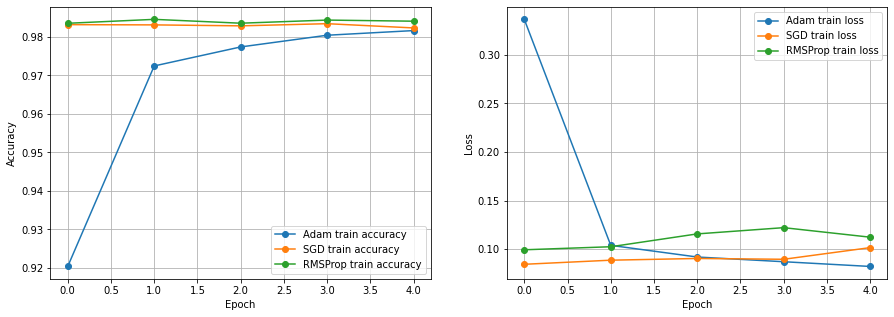

In [18]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='Adam train accuracy')
plt.plot(x.history['accuracy'], 'o-', label='SGD train accuracy')
plt.plot(y.history['accuracy'], 'o-', label='RMSProp train accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='Adam train loss')
plt.plot(x.history['loss'], 'o-', label='SGD train loss')
plt.plot(y.history['loss'], 'o-', label='RMSProp train loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

**Using Normalized data**

In [19]:
h_normalized = adam_model.fit(x=x_train_normalized, y=y_train, epochs=5,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 50s 33ms/step - loss: 0.1627 - accuracy: 0.9449 - val_loss: 0.0546 - val_accuracy: 0.9841
Epoch 2/5
1500/1500 [==============================] - 52s 35ms/step - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0444 - val_accuracy: 0.9874
Epoch 3/5
1500/1500 [==============================] - 52s 34ms/step - loss: 0.0293 - accuracy: 0.9914 - val_loss: 0.0463 - val_accuracy: 0.9881
Epoch 4/5
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0256 - accuracy: 0.9927 - val_loss: 0.0608 - val_accuracy: 0.9875
Epoch 5/5
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0236 - accuracy: 0.9932 - val_loss: 0.0580 - val_accuracy: 0.9865


In [20]:
test_loss, test_acc = adam_model.evaluate(x_test_normalized, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0493 - accuracy: 0.9871

Test accuracy: 0.9871000051498413


In [21]:
x_normalized = sgd_model.fit(x=x_train_normalized, y=y_train, epochs=5,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0212 - accuracy: 0.9938 - val_loss: 0.0509 - val_accuracy: 0.9884
Epoch 2/5
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0208 - accuracy: 0.9942 - val_loss: 0.0620 - val_accuracy: 0.9890
Epoch 3/5
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0177 - accuracy: 0.9950 - val_loss: 0.0581 - val_accuracy: 0.9898
Epoch 4/5
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0194 - accuracy: 0.9948 - val_loss: 0.0636 - val_accuracy: 0.9877
Epoch 5/5
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0169 - accuracy: 0.9954 - val_loss: 0.0521 - val_accuracy: 0.9909


In [24]:

y_normalized = rmsprop_model.fit(x=x_train_normalized, y=y_train, epochs=5,validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0140 - accuracy: 0.9962 - val_loss: 0.0554 - val_accuracy: 0.9898
Epoch 2/5
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0143 - accuracy: 0.9964 - val_loss: 0.0874 - val_accuracy: 0.9881
Epoch 3/5
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0154 - accuracy: 0.9960 - val_loss: 0.0958 - val_accuracy: 0.9877
Epoch 4/5
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0139 - accuracy: 0.9969 - val_loss: 0.0830 - val_accuracy: 0.9868
Epoch 5/5
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0154 - accuracy: 0.9967 - val_loss: 0.0923 - val_accuracy: 0.9872


In [30]:
test_loss, test_acc =rmsrop_model.evaluate (x_test_normalized, y_test)
print('\nTest accuracy:', test_acc)

NameError: ignored

**Adam (normalized vs without normalized)**

In [31]:
lt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.plot(h_norma.history['accuracy'], 'o-', label = 'normalized data accuracy')
plt.plot(h_norma.history['val_accuracy'], 'o-', label = 'normalized validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.plot(h_norma.history['loss'], 'o-', label='normalized data loss')
plt.plot(h_norma.history['val_loss'], 'o-', label='normalized validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

NameError: ignored

**Analyzing the affect of using and not using data normalization:**

We were able to improve the accuracy of this model by using normalized data. The Adam's function produced substantially greater accuracy in the first epoch for normalized data, as shown in the graph above. When we compare the accuracy, we can observe that Adam>SGD>RMSprop was the order of preference. Apparetly We were able to improve the precision of our data training by using data visualization.


According to the visualization graph below, each optimization function has a higher accuracy for normalization data.



**Displaying normalized data in various optimization function**

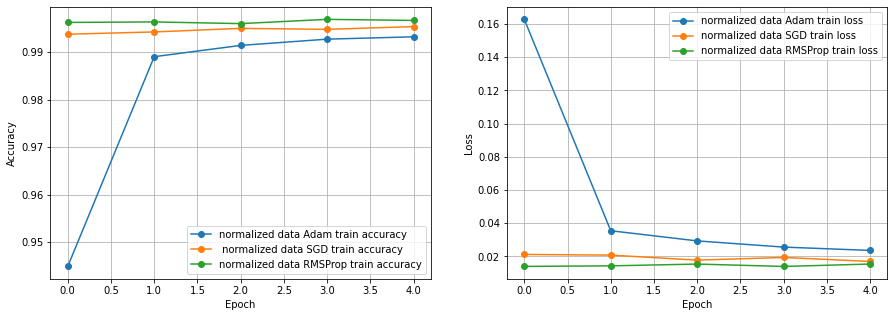

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h_normalized.history['accuracy'], 'o-', label='normalized data Adam train accuracy')
plt.plot(x_normalized.history['accuracy'], 'o-', label=' normalized data SGD train accuracy')
plt.plot(y_normalized.history['accuracy'], 'o-', label='normalized data RMSProp train accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h_normalized.history['loss'], 'o-', label='normalized data Adam train loss')
plt.plot(x_normalized.history['loss'], 'o-', label='normalized data SGD train loss')
plt.plot(y_normalized.history['loss'], 'o-', label='normalized data RMSProp train loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()